## Unit 4 - Geometry & Inner Product Spaces

### Vector Geometry

Basic Properties of Inner Product Spaces
Suppose $V, <\cdot,\cdot>$ ($V$ together with an inner product) is an inner product space over $\mathbb{R}$. Then the following results hold:

1) Norm Axioms for $|| \cdot ||= \sqrt{<\cdot,\cdot>}$ (square root as an inner product of something and itself) ($||\cdot||$ is the norm function)

* $\forall x,y \in V, \forall a \in \mathbb{R}$
  * $|| x || > 0$ for $x != 0 $
  * $|| ax || = |a| \cdot ||x||$
  * $|| x + y || <= ||x|| + ||y||$
     
2) Cauchy-Schwartz Inequality:

* $||<x,y>|| <= ||x|| \cdot ||y||$

3) Parallelogram Law

* $ ||x + y||^2 + ||x-y||^2 = 2(||x||^2 + ||y||^2)$
* Called the parallelogram law because you can draw a parallelogram between two vectors 
* Important theoretically to distinguish norms that come from inner products vs. norms that don't come from inner products - the norm comes from an inner product iff it satisfies the parallelogram law

4) Pythagorean Theorem (linear algebrea version)
* If $<x,y> = 0$ then $||x-y||^2 = ||x||^2 + ||y||^2 = ||x+y||^2$
* The inner product of two vectors is 0 if they are at right angles to one another


### Inner Product Spaces and Examples

An inner product space is a vector space together with an inner product function $< \cdot, \cdot>: V \rightarrow \mathbb{R}$ that satisfies three axioms. 

1) Symmetry: $<u,v> = <v,u>$
2) Linearity (in the 1st argument): $<u_1+u_2, v> = <u_1,v> + <u_2,v>$ and $<au,v>=a<u,v>$
3) Positive Definiteness: $<u,u> >= 0$ and  $<u,u> = 0$ iff $u = \vec{0}$

From any inner product, we can define notions of length, distance and directional correlation (similarity)

* length(u) $= \sqrt{<u,u>}$
* distance(u,v) $= \sqrt{<u-v,u-v>}$
* directional_correlation(u,v) $= \frac{<u,v>}{ \sqrt{<u,u><v,v>}}$

Examples:

$\mathbb{R}^n$ prototypical example
* $<x,y> = x^Ty = \sum_{k=1}^nx_ky_k$
* This is the definition used in the first unit to define inner product, matrix vector product, matrix multiplication, etc.

We can also define for any diagonal matrix $D$, another inner product on $\mathbb{R}^n$
* $<x,y> = x^TDy = \sum_{k=1}^nx_kd_{kk}y_k$
* In data science, you use this version all the time since this give a notion of distance. Many times in data science, you have pieces of data that don't have the same weight. In a housing data set, when predicting prices, maybe the location feature should be weighed more highly that the other features. This method basically uses linear algebra to apply a diagonal matrix to increase/decrease the weights of the features in the data set. 

In $\mathbb{R}[x]$ a typical inner product is

* $<p(x), q(x)> = \int_{-1}^{1}p(x)q(x)dx$
* This inner product satisfies the three axioms

In $\mathbb{R}^{n*n}$:

* $<A,B> = Trace(A^TB)$

### Orthonormal Sets of Vectors

This section describes a process for taking any basis in an inner product space and converting it to an orthonormal space that has similar geometric properties to the standard basis in $\mathbb{R}^n$

Let $V,<\cdot,\cdot>$ be an inner product space. A set of vectors $u_1..u_m$ are called orthogonal if $<u_i, u_j> = 0$ for $i<>j$ (a set of vectors that are pairwaise perpendicular to each other). We say $u_1..u_m$ are orthonormal if $<u_i,u_i> = 1 $ for each $i=1..m$.

Example: In $\mathbb{R}^n$, $e_1,..e_n$ are orthonormal. They are orthonormal because if you take the inner product of any two of them (pairwise with a different subscript), the result is always 0. If you take them pairwise with the same subscript, the result is always 1. 

Theorem: Given any set of vectors $v_1..v_n$ for an inner product space $V$, there exists a separate set of vectors $u_1..u_n$ such that $u_1..u_n$ are orthonormal and Span($u_1..u_n$) = Span($v_1,v_n$).

Proof:

Gram-Schmidt Process (Algorithm)

```
Input v_1..v_n
Set w_1 = v_1
For k=2...n
    Set w_k = v_k - (Sum from j=1 to k ( (<v_j, w_j> / <v_j, v_j>) * v_j ))
    # this is the orthogonalization step
For k=1...n
    Set u_k = w_k / (|| w_k |||)
    # this is the orthornormalization step
Output u_1...u_n

# this will always result in a set of vectors that is orthonormal to the original set

```

Example: 

$V = \mathbb{R}[x]_{<=2}$ (Polynomials with degree <= 2)

$<p(x),q(x)> = \int_{0}^{1}p(x)q(x)dx$

Starting basis: {$1,x,x^2$} - this is not orthogonal or orthonormal

Orthogonalization step works out to: {$1,x-\frac{1}{2},x^2-x-\frac{1}{6}$}

Orthonormalization step: {$1, 2\sqrt{3}(x-\frac{1}{2}), 6\sqrt{5}(x^2-x-\frac{1}{6}) $

### Adjoints

Discuss an inner product space application called an adjoint, a generalization of the notion of a transpose of a linear map between two vector spaces.

Let $V, W$ be inner product spaces and let $T \in L(V,W)$ ($T$ is a linear map from V to W). 

We want to define a new linear map that's the transpose of $T$. We don't want to define $T$ in terms of its matrix coefficients, we want to define $T$ in terms of its properties.

Notice: For every $w \in W$, the function $<w, \cdot>: W \rightarrow \mathbb{R} \in L(W,\mathbb{R})$. The function $<w, \cdot> is a linear map from $W$ to $\mathbb{R}$

Since $T$ is a function from $V$ to $W$. If we compose $<w, \cdot>$ with $T$, we get a function (linear map) from $V$ to $\mathbb{R}$:

$<w, \cdot> \circ T:V \rightarrow \mathbb{R} \in L(V, \mathbb{R})$

We know, from earlier lessons on linear maps, that every linear map from $V \rightarrow \mathbb{R}$ can be represented as an inner product. It has the form:

$<v,\cdot>$ for some $v \in V$

So, we can use these two functions, $<w, \cdot> \circ T$ and $<v,\cdot>$ to define the adjoint of $T$ by 

$T^*: W \rightarrow V$

$T^*(w)$ = the $v \in V$ such that $<w, \cdot> \circ T = <v, \cdot>$

Another way to say this is: $<w, T(u)> = <v,u> $for every $u \in V$

**Properties of Adjoints**

Given any bases  $v_1..v_n$ of $V$ and $w_1..w_n$ of $W$:
* $M(T,\vec{v}, \vec{w}) = [M(T^*, \vec{w},\vec{v})]^{Transpose}$

**Special Cases**

Definition: A linear map $T \in L(V)$ is called self-adjoint if $T=T^*$

Note: The matrix of a sefl-adjoint linear map is symmetric - the matrix is equal to it's transpose.

**Spectral Theorem**

If $T \in L(V)$ is self-adjoint, then $V$ has an orthonormal basis consisting of eigenvectors of $T$.

Note: Relative to this basis, $M(T)$ is diagonal (with the eigenvalues on the diagonal)

### Singular Value Decomposition

One of the most important decompositions that applies to linear maps on inner product spaces. It can be applied to any linear map on an inner product space and relies on adjoints. 

Let $T \in L(V)$. $T$ is called positive if $T$ is self-adjoint (its matrix is symmetric) and all of its eigenvalues are positive. 

Def: For $T$ positive, define $\sqrt{T}$ to be the unique positive linear map $R \in L(V)$ such that $R \circ R = T$

Example:

$\sqrt{\left[\begin{matrix} 1 & 0 & 0 \\ 0 & 4 & 0 \\ 0 & 0 & 9 \end{matrix}\right]} = \left[\begin{matrix} 1 & 0 & 0 \\ 0 & 2 & 0 \\ 0 & 0 & 3 \end{matrix}\right]$ 

This is a positive matrix because all of the eigenvalues are positive

Fact: For any $T \in L(V)$, the linear operator $T^* \circ T$ is positive. $T^*$ is the adjoint of $T$. Composing $T$ with its adjoint always gives a positive matrix.

Definiton: A linear map $S \in L(V)$ is called an isometry if $||Sv|| = ||v||$ for every $v \in V$. An isometry is a linear operator that never changes the norms of any vector. It never changes it's distance from the origin. Isometries have many other properties:
* Preserves orthonormal bases - It doesn't the fact that the original bases are perpendicular to each other
* $S^*S = I = SS^*$ (This means the adjoint of an isometry is also its inverse)

Definition: Singular Values of $T$ are the eigenvalues of $\sqrt{T^*T}$



**Single Value Decomposition Theorem**: 

Every linear map $T \in L(V)$ can be factored as $T=U \sum V$ where $U$ and $V$ are isometries and the matrix of $\sum$ is diagonal with singular values of $T$ on the diagonal

### Orthogonal Projections

Applications of inner product spaces to data science

Definition: For two vectors $U$, $V$, define the projection of $U$ onto $V$ (denoted $proj_vu$) is the component of $u$ in the direction of $v$.

Text(1, -2, 'proj_v u ')

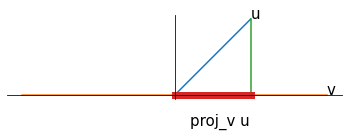

In [46]:
import matplotlib.pyplot as plt
import numpy as np

m = 1
b = 0
x = np.linspace(0, 5, 100)
y = m*x + b

fig, ax = plt.subplots()

ax.set_aspect('equal')

# graph spines
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

ax.plot(x, y)
ax.text(5, 5, 'u', size=15)

x2 = np.linspace(-10, 10, 100)
y2 = np.zeros(100)
ax.plot(x2, y2)
ax.text(10, 0, 'v', size=15)

ax.plot([5,5], [5,0])
ax.plot([0,5], [0,0] ,linewidth=7.0)

ax.text(1, -2, 'proj_v u ', size=15)

Definition in terms of inner product spaces:

$proj_uv$ = directional_correlation($u,v$) $\cdot ||u|| \cdot \frac{v}{||v||}$

directional_correlation $\cdot ||u||$ is the length. 

$\frac{v}{||v||}$ is the direction

To compute $proj_uv$, use:

$\frac{<u,v>}{<v,u>}v$ (this is the exact same as what's defined above)

**Lemma**: $proj_uv$ is the vector in the same direction as $v$ that is closest to $u$.

We want to establish the notion that the projection is the thing that minimizes distance. 

**Proof Sketch** 

Define $f(c) = ||cv-u||$ (the distance between $cv$ and $u$)

So, if we figure out which value of $c$ minimizes $f(c) = ||cv-u||$, then that will exactly solve the problem and we want to show that $c = \frac{<u,v>}{<v,u>}$. 

We want to minimize $f(c)$ which is the same as minimizing 

$(f(c))^2 = ||cv-u||^2$

$(f(c))^2 = <cv-u,cv-u>$

$(f(c))^2 = <cv,cv> + <cv,-u> + <-u,cv> + <-u,-u>$

$(f(c))^2 = <cv,cv> -2<u,cv> + <u,u>$

$(f(c))^2 = c^2<v,v> - 2c<u,v> + <u,u>$

$F(c) = (f(c))^2$

$F`(c) = 2c<v,v>-2<u,v>$

Set $F`(c) = 0 = 2c<v,v>-2<u,v> $

$c = \frac{<u,v>}{<v,u>}$

So...

$\frac{<u,v>}{<v,u>}$ is the value of $c$ that minimizes the distance between $cv-u$. The closest vector to $u$ that lies along $v$ is $\frac{<u,v>}{<v,u>}v$ which is exactly $proj_uv$


### Least Squares Regression

Suppose we have an over-determined (over-constrained) linear system.

$ \left[\begin{matrix}  A&  &  &  & | b \\  &  &  &  & | \\  &  &  &  & | \\  &  &  &  & | \\  &  &  &  & | \end{matrix}\right]$

$m>n$. There are more rows than columns, typical for a data science problem. More rows than features. 

We can't solve $Ax = b$ but we can find a vector $x$ that makes $Zx$ as close to $b$ as possible. 

How to find this $x$?

Use orthogonal projections. 

Suppose $x$ is a solution to the minimization problem $\min_{x} ||Ax-b||$


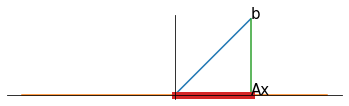

In [48]:
import matplotlib.pyplot as plt
import numpy as np

m = 1
b = 0
x = np.linspace(0, 5, 100)
y = m*x + b

fig, ax = plt.subplots()

ax.set_aspect('equal')

# graph spines
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

ax.plot(x, y)
ax.text(5, 5, 'b', size=15)

x2 = np.linspace(-10, 10, 100)
y2 = np.zeros(100)
ax.plot(x2, y2)
ax.text(5, 0, 'Ax', size=15)

ax.plot([5,5], [5,0])
ax.plot([0,5], [0,0] ,linewidth=7.0)

#ax.text(1, -2, 'proj_b Ax ', size=15)

Since $x$ is the solution, $Ax$ is just a fixed vector.

To say that $Ax$ is the solution is to say that $Ax$ is exactly the vector in the direction of $Ax$ that minimizes from $b$.

We get the constraint that $Ax = proj_{Ax}b$

$Ax = \frac{<b,Ax>}{<Ax,Ax>}Ax$ (here, $\frac{<b,Ax>}{<Ax,b>}$ is just some constant)

This implies that $\frac{<b,Ax>}{<Ax,b>}$ has be to equal to 1 to make the equation true. 

Therefore, $<b,Ax> = <Ax,Ax>$ (the numerator must equal the denominator)

$<b,Ax> = <Ax,Ax>$

$(Ax)^Tb = (Ax)^TAx$

$x^TA^Tb = x^TA^TAx$

This constraint is satisfied if $A^Tb = A^TAx$

Theorem: If the columns of $A$ are linearly independent, then $A^TA$ is invertible so that:

$A^TAx=A^Tb$ has a unique solution for $x$

Any solution for $x$ is also a solution to the linear system:

$\left[\begin{matrix}  A^TA | A^Tb \end{matrix}\right]$

This is a relatively easy system to solve with singular value decomposition, eignevalues, etc. using linear algebra instead of vector calculus